INSTALLING REQURIED PACKAGES





In [0]:
! pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-wsbo06ha
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-wsbo06ha
  Created wheel for Theano: filename=Theano-1.0.4+51.gf1e4ec47c-cp36-none-any.whl size=2667983 sha256=3c2651267a9885a0c05ac9ca83a46b891c22ceaaef85a08566be0fb7ff49481d
  Stored in directory: /tmp/pip-ephem-wheel-cache-so0n80sq/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
  Found existing installation: Theano 1.0.4
    Uninstalling Theano-1.0.4:
      Successfully uninstalled Theano-1.0.4


INSTALL TENSOR FLOW

In [0]:
!pip install tensorflow

INSTALL AND UPGRADE KERAS


In [0]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [0]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image 


DISPLAY DATASET IN GREY SCALE IMAGES TO SHOW DIFFERENCE BETWEEN CONSTRUCTION WORKERS AND NORMAL PERSONS







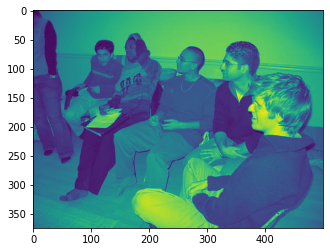

In [0]:

from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img=Image.open('/content/drive/My Drive/dataset/training_set/normal_person/neg_1000.jpg').convert('L')
img.save('/content/drive/My Drive/dataset/training_set/normal_person/neg_1000.jpg')
im=mpimg.imread('/content/drive/My Drive/dataset/training_set/normal_person/neg_1000.jpg')
a=plt.imshow(im)
plt.show(a)

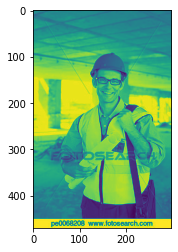

In [0]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img=Image.open('/content/drive/My Drive/Colab Notebooks/pos_27.jpg').convert('L')
img.save('/content/drive/My Drive/Colab Notebooks/pos_27.jpg')
im=mpimg.imread('/content/drive/My Drive/Colab Notebooks/pos_27.jpg')
a=plt.imshow(im)
plt.show(a)

CREATE CNN MODEL {START WITH IMPORT REQUIRED METHODS TO BUILT FROM KERAS
}

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


Using TensorFlow backend.


In [0]:
classifier = Sequential()

In [0]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [0]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [0]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
classifier.add(Flatten())

In [0]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

TRAINING THE MODEL

In [0]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 2000)

Found 2533 images belonging to 2 classes.
Found 1008 images belonging to 2 classes.
Epoch 1/10
 35/200 [====>.........................] - ETA: 22:54 - loss: 0.4713 - accuracy: 0.7740

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


200/200 [==============================] - 1746s 9s/step - loss: 0.4309 - accuracy: 0.7931 - val_loss: 0.9440 - val_accuracy: 0.5911
Epoch 2/10
200/200 [==============================] - 888s 4s/step - loss: 0.3728 - accuracy: 0.8259 - val_loss: 0.8718 - val_accuracy: 0.5102
Epoch 3/10
200/200 [==============================] - 903s 5s/step - loss: 0.3302 - accuracy: 0.8468 - val_loss: 0.6138 - val_accuracy: 0.6985
Epoch 4/10
200/200 [==============================] - 921s 5s/step - loss: 0.3137 - accuracy: 0.8620 - val_loss: 0.5181 - val_accuracy: 0.6984
Epoch 5/10
200/200 [==============================] - 916s 5s/step - loss: 0.2743 - accuracy: 0.8804 - val_loss: 0.5044 - val_accuracy: 0.6885
Epoch 6/10
200/200 [==============================] - 895s 4s/step - loss: 0.2305 - accuracy: 0.9018 - val_loss: 0.6742 - val_accuracy: 0.7192
Epoch 7/10
200/200 [==============================] - 898s 4s/step - loss: 0.2185 - accuracy: 0.9094 - val_loss: 1.2098 - val_accuracy: 0.6291
Epoch 8/1

SAVE THE MODEL

In [0]:
classifier.save('/content/drive/My Drive/classifier27_shiva.h5')

PREDICTION CONFUSION MATRIX


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
Y_pred = classifier.predict_generator(test_set, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['construction_worker','normal_person']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[662   0]
 [346   0]]
Classification Report
                     precision    recall  f1-score   support

construction_worker       0.66      1.00      0.79       662
      normal_person       0.00      0.00      0.00       346

           accuracy                           0.66      1008
          macro avg       0.33      0.50      0.40      1008
       weighted avg       0.43      0.66      0.52      1008



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PLOTTING TRAINING ACCURACY AND LOSS

In [0]:
history = classifier.fit(training_set,  epochs = 10)

Epoch 1/10
31/80 [==========>...................] - ETA: 22s - loss: 0.1720 - accuracy: 0.9244

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


80/80 [==============================] - 37s 457ms/step - loss: 0.1395 - accuracy: 0.9447
Epoch 2/10
80/80 [==============================] - 35s 435ms/step - loss: 0.1313 - accuracy: 0.9526
Epoch 3/10
80/80 [==============================] - 35s 436ms/step - loss: 0.1200 - accuracy: 0.9510
Epoch 4/10
80/80 [==============================] - 35s 435ms/step - loss: 0.0981 - accuracy: 0.9637
Epoch 5/10
80/80 [==============================] - 35s 435ms/step - loss: 0.0964 - accuracy: 0.9684
Epoch 6/10
80/80 [==============================] - 35s 435ms/step - loss: 0.0998 - accuracy: 0.9609
Epoch 7/10
80/80 [==============================] - 40s 505ms/step - loss: 0.0746 - accuracy: 0.9712
Epoch 8/10
80/80 [==============================] - 35s 435ms/step - loss: 0.0805 - accuracy: 0.9700
Epoch 9/10
80/80 [==============================] - 35s 443ms/step - loss: 0.0751 - accuracy: 0.9720
Epoch 10/10
80/80 [==============================] - 35s 439ms/step - loss: 0.0694 - accuracy: 0.9751


Text(0, 0.5, 'Loss')

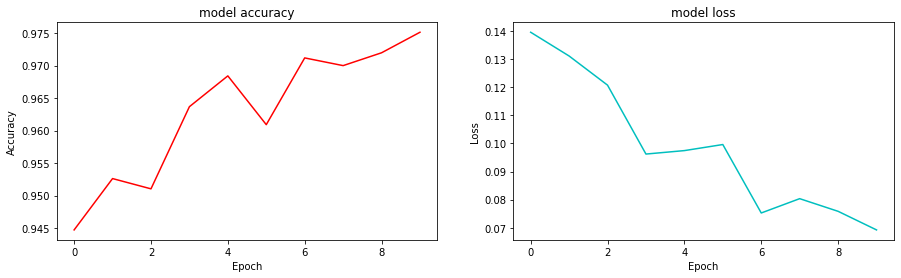

In [0]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='r')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='c')
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

PREDICTION

In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/dataset/test_set/construction_worker/pos_1527.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
   print('hard hat and safety vest not being worn' ) 
else:
  print( 'hard hat and safety vest  being worn')

hard hat and safety vest  being worn
